In [36]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 1) Load data and Overview

In [37]:
df = pd.read_csv('../data/book100k-200k.csv')

In [38]:
df.size

1026828

In [39]:
df.describe()

,pagesNumber,Rating,CountsOfReview,PublishDay,PublishMonth,Id,PublishYear
count,5.704600e+04,57046.000000,57046.000000,57046.000000,57046.000000,57046.000000,57046.000000
mean,3.244922e+02,3.542262,37.355345,6.310434,10.008432,149349.653736,1998.998177
std,9.482250e+03,1.189968,370.091928,3.608969,10.401136,28933.167578,8.689114
min,0.000000e+00,0.000000,0.000000,1.000000,1.000000,100000.000000,1623.000000
25%,1.600000e+02,3.540000,0.000000,3.000000,1.000000,124114.250000,1996.000000
50%,2.510000e+02,3.890000,2.000000,6.000000,5.000000,149387.500000,2001.000000
75%,3.520000e+02,4.120000,12.000000,9.000000,18.000000,174562.750000,2005.000000
max,2.254246e+06,5.000000,52088.000000,12.000000,31.000000,199999.000000,2020.000000


In [40]:
df.head()

,pagesNumber,Authors,Publisher,Rating,Language,RatingDistTotal,RatingDist5,RatingDist3,CountsOfReview,PublishDay,ISBN,RatingDist4,PublishMonth,Id,PublishYear,RatingDist1,RatingDist2,Name
0,400,Royce Flippin,PublicAffairs,4.18,NaN,total:11,5:3,3:1,1,9,1560256133,4:7,20,100000,2004,1:0,2:0,The Best American Political Writing 2004: Spec...
1,30,Gail Sakurai,Turtleback Books,4.00,NaN,total:6,5:2,3:2,0,9,061390737X,4:2,1,100004,1996,1:0,2:0,Stephen Hawking: Understanding the Universe
2,16,Sandi Hill,Creative Teaching Press,3.60,NaN,total:5,5:0,3:2,2,3,1574713388,4:3,1,100007,1998,1:0,2:0,Detective Dog and the Search for Cat
3,280,Bob Butz,Lyons Press,3.21,NaN,total:29,5:3,3:12,6,1,1592284469,4:8,1,100010,2005,1:2,2:4,"Beast of Never, Cat of God: The Search for the..."
4,193,Raymond B. Marcin,Catholic University of America Press,3.43,NaN,total:7,5:0,3:2,0,2,0813214300,4:4,3,100011,2006,1:0,2:1,In Search of Schopenhauer's Cat: Arthur Schope...


In [41]:
df.dtypes

pagesNumber          int64
Authors             object
Publisher           object
Rating             float64
Language            object
RatingDistTotal     object
RatingDist5         object
RatingDist3         object
CountsOfReview       int64
PublishDay           int64
ISBN                object
RatingDist4         object
PublishMonth         int64
Id                   int64
PublishYear          int64
RatingDist1         object
RatingDist2         object
Name                object
dtype: object

# 2) Check for Duplications

- There are no fully duplicated rows

In [42]:
df.duplicated(keep=False).sum()

0

# 3) Check & Address NaN

In [43]:
df.isna().sum()

pagesNumber            0
Authors                0
Publisher            585
Rating                 0
Language           42892
RatingDistTotal        0
RatingDist5            0
RatingDist3            0
CountsOfReview         0
PublishDay             0
ISBN                 256
RatingDist4            0
PublishMonth           0
Id                     0
PublishYear            0
RatingDist1            0
RatingDist2            0
Name                   0
dtype: int64

## Publisher:

- If publisher is NaN, it's usually classics or religious (e.g. the Bible, or Plato's Republic)

In [44]:
df[df['Publisher'].isna()]['Name'].head(10)

283        Daphne Dragon (Pull-out Books) (Mini-monsters)
421                  Titan God Machine (Titan 1, 2 and 3)
575                                            Republic 1
693     Brodie's Notes On Alan Sillitoe's Selected Fic...
905       Adventures in Odyssey: At Home and Abroad (#13)
908                                         Odyssey I–XII
1007        Holy Image, Hallowed Ground: Icons from Sinai
1070    Idea De La Muerte En Mexico/ Idea of the Death...
1082    History of Civilization: The Northern European...
1271                                  Animal Farm (Plays)
Name: Name, dtype: object

- Therefore, we have decided to encode NaN Publisher values as "Unknown"

In [45]:
print(df['Publisher'].isna().sum().astype(str) + ' NaN values replaced by "Unknown"')
df['Publisher'] = df['Publisher'].fillna("Unknown")

585 NaN values replaced by "Unknown"


## Language:



- After checking multiple samples of rows with NaN values for "Language", we have realised most titles (Name) are in English.

In [46]:
# Check titles of samples that have NaN language values to see if there's a frequent language. It's English.

# TODO implement a heuristic tool with the most popular English stopwords

df[df['Language'].isna()].sample(20)['Name']

2918                                   Mirrors of the Soul
53069    A Color Atlas of Diseases of Lettuce and Relat...
56278    Mind of Clear Light: Advice on Living Well and...
14474    Die Lehren Des Don Juan. Ein Yaqui  Weg Des Wi...
29409    Flexible-Link Robot Manipulators: Control Tech...
54921    American Medical Association Guide to Your Fam...
22843                  Storybook Favorites in Cross-Stitch
41710    Conservations with the King: Meditations That ...
53665    Plantation Slavery on the East Coast of Africa...
1950                  Unearned Pleasures and Other Stories
258      The Quest for Sir Arthur Conan Doyle: Thirteen...
20186    The Reflective Practitioner: How Professionals...
21830              The Engine of Owl-light (Paladin Books)
49766                                            Wildfire!
20769      Chimpanzees I Love: Saving Their World And Ours
27376    Beyond Reason: Essays on the Philosophy of Pau...
937                                      Conan of Venari

- The majority of the titles of the dataset are also in English.

In [47]:
df['Language'].value_counts().head(10)

eng      10938
en-US     1663
fre        444
en-GB      435
spa        293
ger        222
ita         43
zho         25
rus         12
por         11
Name: Language, dtype: int64

- We have decided to encode NaN "Language" values as "eng"

In [48]:
print(df['Language'].isna().sum().astype(str) + ' NaN values replaced by "eng"')
df['Language'] = df['Language'].fillna('eng')

42892 NaN values replaced by "eng"


- After checking unique values for "Language", we have decided to encode all variations of English as "eng"

In [49]:
df['Language'].unique()

array(['eng', 'en-GB', 'en-US', 'spa', 'ger', 'por', 'fre', 'grc', 'mul',
       'zho', 'rus', 'ita', 'glg', 'en-CA', 'frs', 'ind', 'enm', 'lat',
       'kor', 'pol', 'per', 'wel', 'nl', 'ara', 'tur', 'nav', 'nor',
       'jpn', 'swe', 'myn', 'gre', 'urd', 'elx', 'afr', 'cat'],
      dtype=object)

In [50]:
language_mask = df['Language'].str.startswith('en-')
english_varieties = df.loc[language_mask, 'Language']
print(english_varieties.count().astype(str) + ' values standardised as "eng"')
english_varieties = 'eng'

2103 values standardised as "eng"


- To simplify the scope of this project, we will drop all entries that are not in English

In [51]:
print(df['Language'][df.Language != 'eng'].count().astype(str) + ' non-English books removed"')
df = df.drop(df[df.Language != 'eng'].index)

3216 non-English books removed"


## ISBN

- This column is not relevant for the analysis, so we have decided to drop it.

In [52]:
df = df.drop(columns='ISBN')

# 3) Check dates and replace by datetime format

## Months & Days
- This data is irrelevant for our analysis, so we will drop both columns.

In [53]:
df = df.drop(columns=['PublishMonth', 'PublishDay'])

## Year

- Remove all rows with year before the minimum of timestamp (1677)

In [54]:
print(f"Books before {pd.Timestamp.min.year} dropped: {(df['PublishYear'] <= pd.Timestamp.min.year).sum()}")

Books before 1677 dropped: 1


In [55]:
df = df.drop(df[df['PublishYear'] <= pd.Timestamp.min.year].index)

- Remove all rows with year after the current (probably wrong data)

In [56]:
from datetime import date
print(f"Books after {date.today().year} dropped: {(df['PublishYear'] >= date.today().year).sum()}")

Books after 2022 dropped: 0


In [57]:
df = df.drop(df[df['PublishYear'] >= date.today().year].index)

- Convert year to datetime format

In [58]:
df['PublishYear'] = pd.to_datetime(df['PublishYear'], format='%Y')

# 4) Cleaning RatingDistTotal

- Remove "total:" from column and convert to int.

In [59]:
df['RatingDistTotal'] = df['RatingDistTotal'].str.replace("total:", "").astype(int)

# 5) Questions about the data

- Who are the top 5 most rated authors?

In [60]:
df.groupby('Authors')['RatingDistTotal'].sum().sort_values(ascending = False).head()

Authors
J.K. Rowling           12340705
Jane Austen            12025276
William Shakespeare    10184216
C.S. Lewis              9024689
Charlotte Brontë        7833270
Name: RatingDistTotal, dtype: int64

- How many different publishers are there?

In [61]:
df['Publisher'].nunique()

7512

- Who are the top 5 publishers (most published books)?

In [62]:
df.pivot_table(index=['Publisher'], aggfunc ='size').sort_values(ascending=False).head()

Publisher
Oxford University Press, USA    949
Routledge                       930
Cambridge University Press      637
Unknown                         518
Penguin Books                   428
dtype: int64

- Which are the top 5 longest books in the dataset?

In [63]:
df[['pagesNumber', 'Name']].sort_values(by=['pagesNumber'], ascending=False).head()

,pagesNumber,Name
45413,2254246,Sholokhov's Tikhii Don: A Commentary In Two Vo...
36375,205141,2006 Iran Nuclear Threat � Government And Mili...
36374,63987,"2006 Iranian Nuclear Showdown: Iran, Nuclear T..."
24444,9998,Affecting Change: Social Workers in the Politi...
12410,9998,Absolute Beginner's Guide to C


- What is the average rating of all books?

In [64]:
df['Rating'].mean()

3.522571476341749

- What is the mean rating of all books?

In [65]:
df['Rating'].median()

3.88

- Does publisher explain the rating?

[Text(0, 0, 'W. W. Norton  Company'),
 Text(1, 0, 'Pocket Books'),
 Text(2, 0, 'HMH Books for Young Readers'),
 Text(3, 0, 'Mariner Books'),
 Text(4, 0, 'HarperCollins'),
 Text(5, 0, 'Dover Publications'),
 Text(6, 0, 'Vintage'),
 Text(7, 0, 'Bantam'),
 Text(8, 0, 'HarperCollins Publishers'),
 Text(9, 0, 'Penguin Books'),
 Text(10, 0, 'Berkley'),
 Text(11, 0, 'Yale University Press'),
 Text(12, 0, 'University of California Press'),
 Text(13, 0, 'Ballantine Books'),
 Text(14, 0, 'Harper Perennial'),
 Text(15, 0, 'University of Chicago Press'),
 Text(16, 0, "St. Martin's Griffin"),
 Text(17, 0, 'Princeton University Press'),
 Text(18, 0, 'Harvard University Press'),
 Text(19, 0, 'Oxford University Press, USA'),
 Text(20, 0, 'Wiley'),
 Text(21, 0, 'Cambridge University Press'),
 Text(22, 0, 'Unknown'),
 Text(23, 0, "St. Martin's Press"),
 Text(24, 0, 'John Wiley & Sons'),
 Text(25, 0, 'Prentice Hall'),
 Text(26, 0, 'Routledge'),
 Text(27, 0, 'iUniverse'),
 Text(28, 0, 'Springer'),
 Text(2

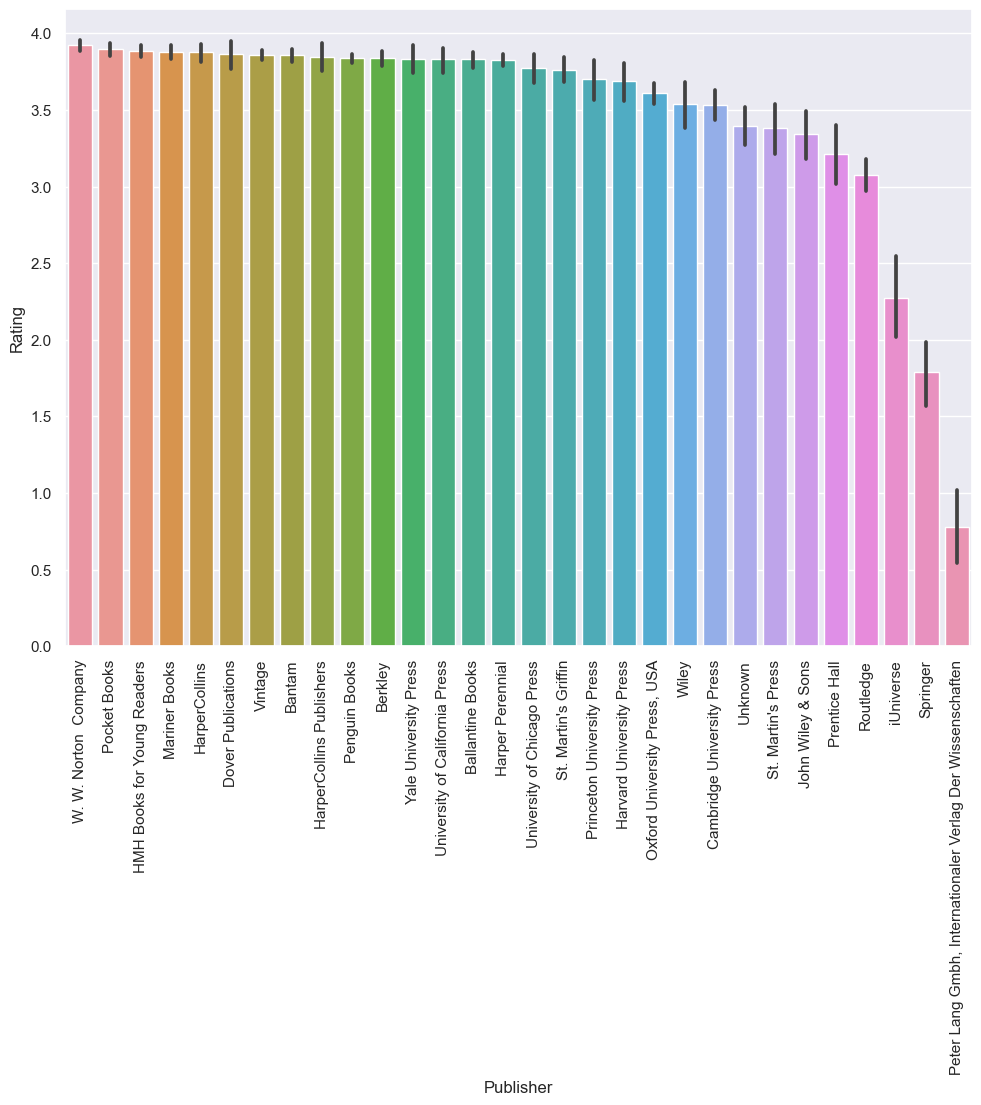

In [66]:
top_publishers = df.pivot_table(index=['Publisher'], aggfunc ='size').sort_values(ascending=False).head(30)
books_from_top_publishers = df[df['Publisher'].isin(top_publishers.index)]
publishers_in_desc_order = books_from_top_publishers.groupby('Publisher').Rating.mean().sort_values(ascending=False).index

g = sns.barplot(data=books_from_top_publishers, 
                x='Publisher', 
                y='Rating',  
                order=publishers_in_desc_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- Does publisher explain amount of reviews?

[Text(0, 0, 'HarperCollins'),
 Text(1, 0, 'HarperCollins Publishers'),
 Text(2, 0, 'Pocket Books'),
 Text(3, 0, 'Vintage'),
 Text(4, 0, 'Ballantine Books'),
 Text(5, 0, 'HMH Books for Young Readers'),
 Text(6, 0, 'Berkley'),
 Text(7, 0, 'Harper Perennial'),
 Text(8, 0, 'Bantam'),
 Text(9, 0, 'Penguin Books'),
 Text(10, 0, 'Mariner Books'),
 Text(11, 0, 'W. W. Norton  Company'),
 Text(12, 0, "St. Martin's Griffin"),
 Text(13, 0, "St. Martin's Press"),
 Text(14, 0, 'Dover Publications'),
 Text(15, 0, 'Unknown'),
 Text(16, 0, 'University of Chicago Press'),
 Text(17, 0, 'Oxford University Press, USA'),
 Text(18, 0, 'Wiley'),
 Text(19, 0, 'Yale University Press'),
 Text(20, 0, 'Princeton University Press'),
 Text(21, 0, 'University of California Press'),
 Text(22, 0, 'John Wiley & Sons'),
 Text(23, 0, 'Harvard University Press'),
 Text(24, 0, 'Prentice Hall'),
 Text(25, 0, 'Routledge'),
 Text(26, 0, 'Cambridge University Press'),
 Text(27, 0, 'iUniverse'),
 Text(28, 0, 'Springer'),
 Text(2

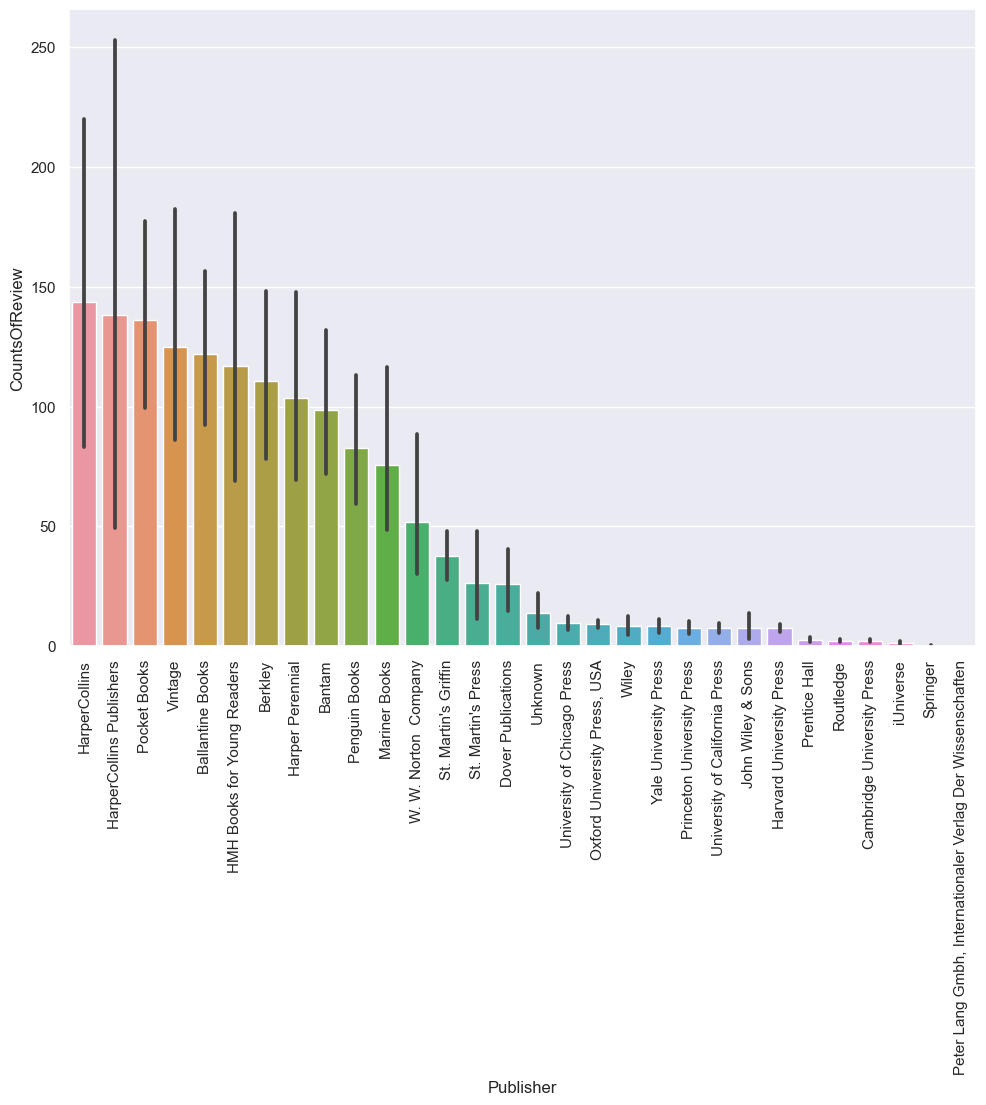

In [67]:
publishers_in_desc_order = books_from_top_publishers.groupby('Publisher').CountsOfReview.mean().sort_values(ascending=False).index

g = sns.barplot(data=books_from_top_publishers, 
                x='Publisher', 
                y='CountsOfReview',  
                order=publishers_in_desc_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Things we would like to know from this dataset

- length of book explains amount of reviews? (scatterplot)
- What's the relationship between amount of reviews and score? (scatterplot)
- Is there any relationship between days since publication and amount of reviews?


# NLP related analysis
- Most common words in titles (tokenization + countvectorizer)
- Which are the rarest words (tokenization + countevectorizer)